# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename, header=0)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [3]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Data set: World Happiness Report
2. Prediction: Happiness score, the label will be 'Life Ladder'.
3. Type: Regression problem
4. Features: 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)'
5. Importance: Understanding the factors that influence happiness can help policymakers improve quality of life and societal well-being. Governments and businesses can use the model to design better policies and programs to boost public well-being, based on what factors matter most for happiness.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [6]:
# Identify missing values
nan_count = df.isnull().sum()
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [7]:
# Impute missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

/tmp/ipykernel_1883/3504590923.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [8]:
# Verify that there are no missing values left in these columns
nan_count_after = np.sum(df.isnull(), axis=0)
nan_count_after

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

In [9]:
import scipy.stats as stats

In [10]:
# Apply winsorization to handle outliers in numeric columns
for col in df.select_dtypes(include=[np.number]).columns:
    df[f'{col}_winsorized'] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,Positive affect_winsorized,Negative affect_winsorized,Confidence in national government_winsorized,Democratic Quality_winsorized,Delivery Quality_winsorized,Standard deviation of ladder by country-year_winsorized,Standard deviation/Mean of ladder by country-year_winsorized,GINI index (World Bank estimate)_winsorized,"GINI index (World Bank estimate), average 2000-15_winsorized","gini of household income reported in Gallup, by wp5-year_winsorized"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,...,0.517637,0.258195,0.612072,-1.929690,-1.642179,1.774662,0.476600,0.372846,0.386948,0.445204
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,...,0.583926,0.237092,0.611545,-2.017452,-1.635025,1.722688,0.391362,0.372846,0.386948,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,...,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.372846,0.386948,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,...,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.372846,0.386948,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,...,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.372846,0.386948,0.344540


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

##### New Feature List
After inspecting the data and performing exploratory data analysis, I have decided to keep the following numerical features only:

- Log GDP per capita
- Social support
- Healthy life expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Positive affect
- Negative affect
- Confidence in national government
- Democratic Quality
- Delivery Quality
- GINI index (World Bank estimate)


##### Data Preparation Techniques
To prepare the data for modeling, I will use the following data preparation techniques:

- Handling Missing Values: I will impute missing values with the mean of the respective columns.
- Winsorization: To handle outliers, I will apply winsorization to numeric columns to limit extreme values.
- Feature Scaling: I will standardize the features using StandardScaler to ensure all features contribute equally to the model.

##### Model Selection
For this regression problem, I will use the following model:

- Linear Regression: A simple and interpretable model that will serve as a baseline.

##### Model Training and Evaluation Plan

- Split the Data: I will split the data into training and testing sets with an 80-20 split.
- Feature Scaling: I will standardize the features in both training and testing sets using StandardScaler.
- Model Training: I will initialize and train a Linear Regression model on the scaled training data.
- Model Evaluation: I will evaluate the model's performance using Root Mean Squared Error (RMSE) and R-squared (R2) on the test set.
- Visualization: I will create a scatter plot of actual vs. predicted happiness scores to visually inspect the model's performance.

##### Plan To Improve Model Performance

- Ensemble Methods: Implement Random Forest and Gradient Boosting to leverage the power of ensemble learning, which often provides better performance than individual models.
- Cross-Validation: Use cross-validation to ensure the model performs well on different subsets of the data and reduces the risk of overfitting.
- Model Comparison: Compare the performance of different models (Linear Regression, Random Forest, Gradient Boosting) and select the one with the best performance based on evaluation metrics.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [12]:
# Define features and label
X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
        'Positive affect', 'Negative affect', 'Confidence in national government',
        'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)']]

y = df['Life Ladder']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [17]:
# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
r2_linear = r2_score(y_test, y_pred)

In [18]:
print(f'RMSE: {rmse_linear}')
print(f'R^2: {r2_linear}')

RMSE: 0.55206511106004
R^2: 0.7642863767997607


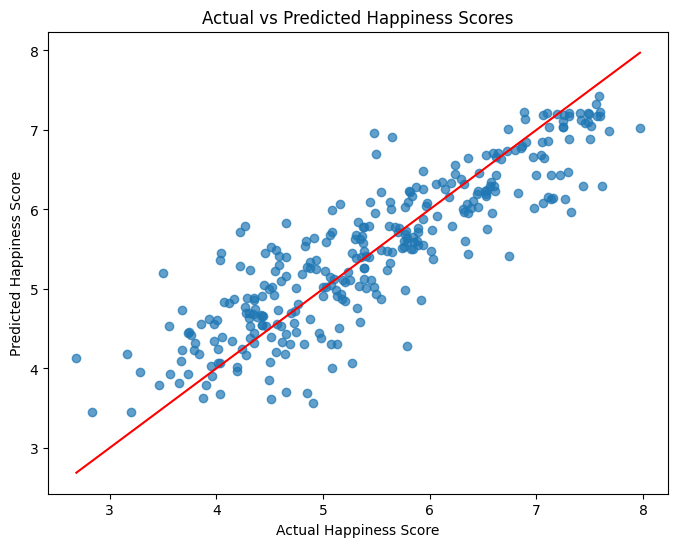

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual vs Predicted Happiness Scores")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line
plt.show()

## Model Improvements

In [20]:
# Implement Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R^2: {r2_rf}')

Random Forest RMSE: 0.380412347791648
Random Forest R^2: 0.8880785597077238


In [21]:
# Implement Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate Gradient Boosting model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
print(f'Gradient Boosting RMSE: {rmse_gb}')
print(f'Gradient Boosting R^2: {r2_gb}')

Gradient Boosting RMSE: 0.44012635762036556
Gradient Boosting R^2: 0.850183779976812


In [22]:
# Cross-validation for model evaluation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = np.sqrt(-cv_scores_rf)
print(f'Random Forest Cross-Validation RMSE: {cv_scores_rf.mean()}')

cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_gb = np.sqrt(-cv_scores_gb)
print(f'Gradient Boosting Cross-Validation RMSE: {cv_scores_gb.mean()}')

Random Forest Cross-Validation RMSE: 0.41152568783183635
Gradient Boosting Cross-Validation RMSE: 0.4467354369541634


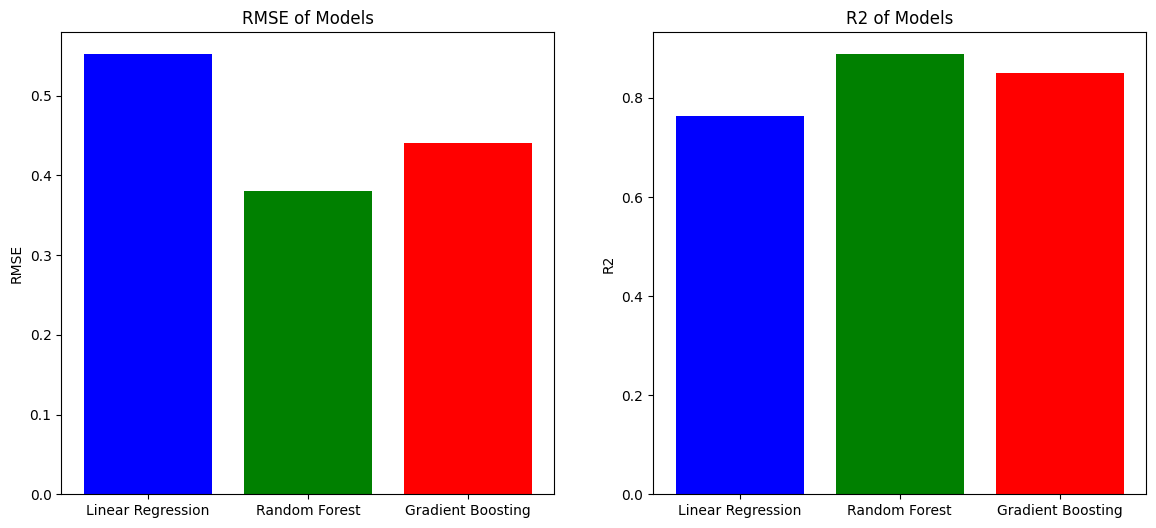

In [23]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse_scores = [rmse_linear, rmse_rf, rmse_gb]
r2_scores = [r2_linear, r2_rf, r2_gb]

plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color=['blue', 'green', 'red'])
plt.title('RMSE of Models')
plt.ylabel('RMSE')

# Plot R2
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.title('R2 of Models')
plt.ylabel('R2')

plt.show()

In [24]:
# Print RMSE and R2 scores for clarity
print(f"Linear Regression - RMSE: {rmse_linear}, R2: {r2_linear}")
print(f"Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}")
print(f"Gradient Boosting - RMSE: {rmse_gb}, R2: {r2_gb}")

Linear Regression - RMSE: 0.55206511106004, R2: 0.7642863767997607
Random Forest - RMSE: 0.380412347791648, R2: 0.8880785597077238
Gradient Boosting - RMSE: 0.44012635762036556, R2: 0.850183779976812


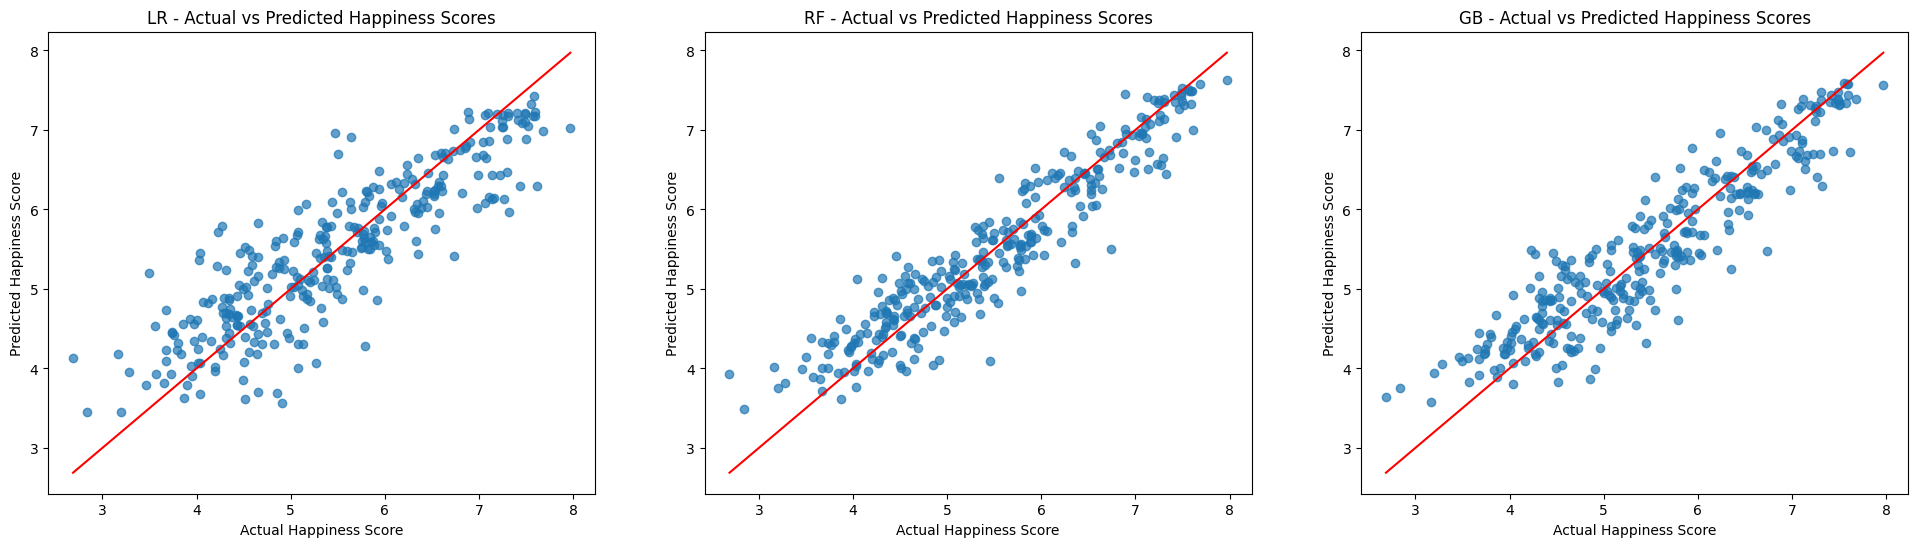

In [25]:
# Plot the scatter plots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Linear Regression plot
axes[0].scatter(y_test, y_pred, alpha=0.7)
axes[0].set_xlabel("Actual Happiness Score")
axes[0].set_ylabel("Predicted Happiness Score")
axes[0].set_title("LR - Actual vs Predicted Happiness Scores")
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line

# Random Forest plot
axes[1].scatter(y_test, y_pred_rf, alpha=0.7)
axes[1].set_xlabel("Actual Happiness Score")
axes[1].set_ylabel("Predicted Happiness Score")
axes[1].set_title("RF - Actual vs Predicted Happiness Scores")
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line

# Gradient Boosting plot
axes[2].scatter(y_test, y_pred_gb, alpha=0.7)
axes[2].set_xlabel("Actual Happiness Score")
axes[2].set_ylabel("Predicted Happiness Score")
axes[2].set_title("GB - Actual vs Predicted Happiness Scores")
axes[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Identity line

plt.show()

##### Final Analysis

The Random Forest model seems to perform better than Linear Regression and Gradient Boosting models in predicting happiness scores. The Random Forest model achieved the lowest RMSE of 0.380, indicating the highest accuracy in predictions. Additionally, it had the highest R2 value of 0.888, suggesting it explained the most variance in the data. The scatterplot for the Random Forest model further supports this, as the predicted values fell closer to the actual values line, indicating higher accuracy.